# Импорт библиотек

In [37]:
#!/usr/bin/env python3
import subprocess
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']

# Функция для запуска тестов и получения данных

In [38]:
def get_random_data():
    # Получаем данные из C++ программы с правильной кодировкой
    result = subprocess.run(["lab3.exe"], capture_output=True, timeout=30)
    
    # Декодируем вывод как бинарные данные, игнорируя ошибки кодировки
    output = result.stdout.decode('utf-8', errors='ignore')
    
    # Парсим вывод - ищем числовые данные
    numbers = []
    lines = output.strip().split('\n')
    
    for line in lines:
        line = line.strip()
        if line and line.isdigit():
            numbers.append(int(line))
    
    numbers = np.array(numbers, dtype=np.uint64)
    
    # Нормировка данных
    rnd = numbers / np.max(numbers)
    
    return rnd

# Загружаем данные
rnd = get_random_data()
print(f"Загружено {len(rnd)} случайных чисел")
print(f"Диапазон значений: [{np.min(rnd):.6f}, {np.max(rnd):.6f}]")

Загружено 10000000 случайных чисел
Диапазон значений: [0.000000, 1.000000]


# Гистограммы для разных размеров выборок

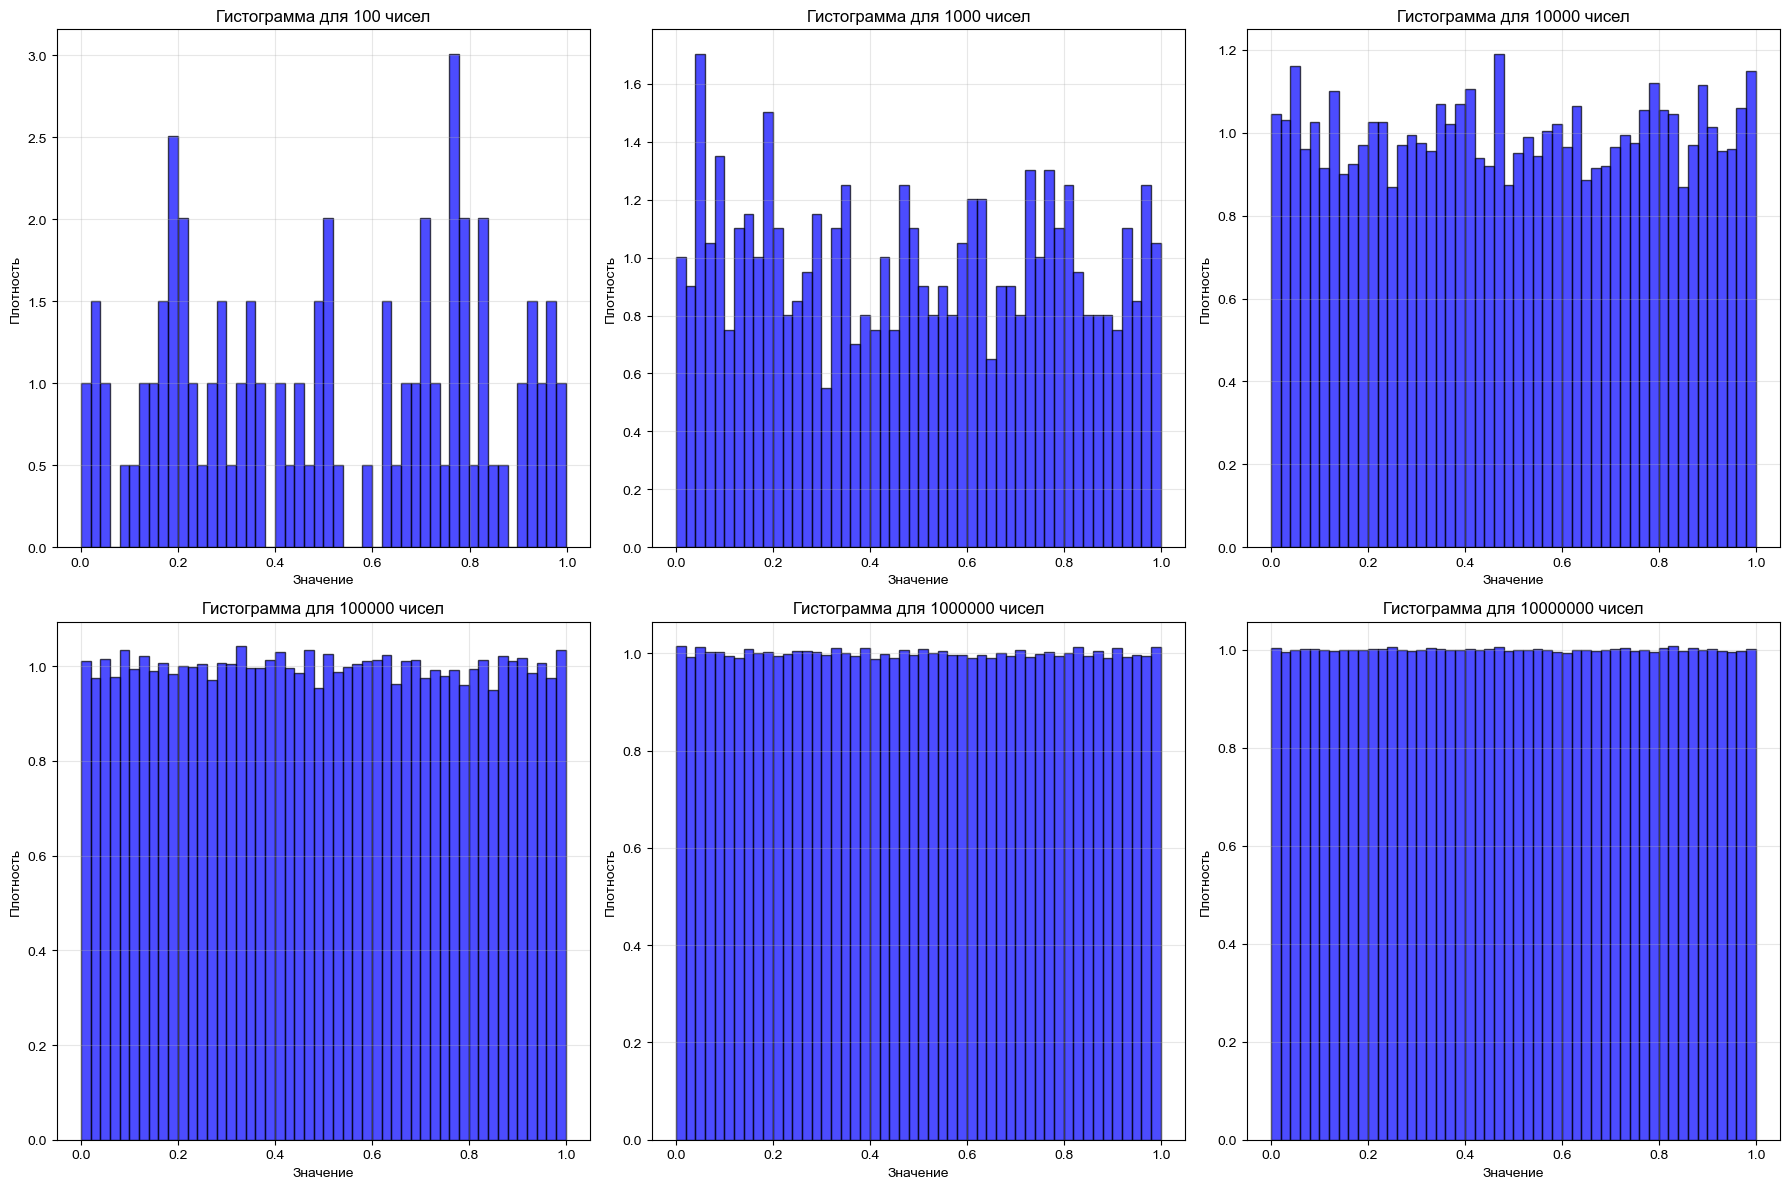

In [39]:
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, size in enumerate(sizes):
    if size <= len(rnd):
        data = rnd[:size]
        axes[i].hist(data, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
        axes[i].set_title(f'Гистограмма для {size} чисел')
        axes[i].set_xlabel('Значение')
        axes[i].set_ylabel('Плотность')
        axes[i].grid(True, alpha=0.3)
    else:
        # Если данных недостаточно, скрываем ось
        axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Диаграмма рассеяния

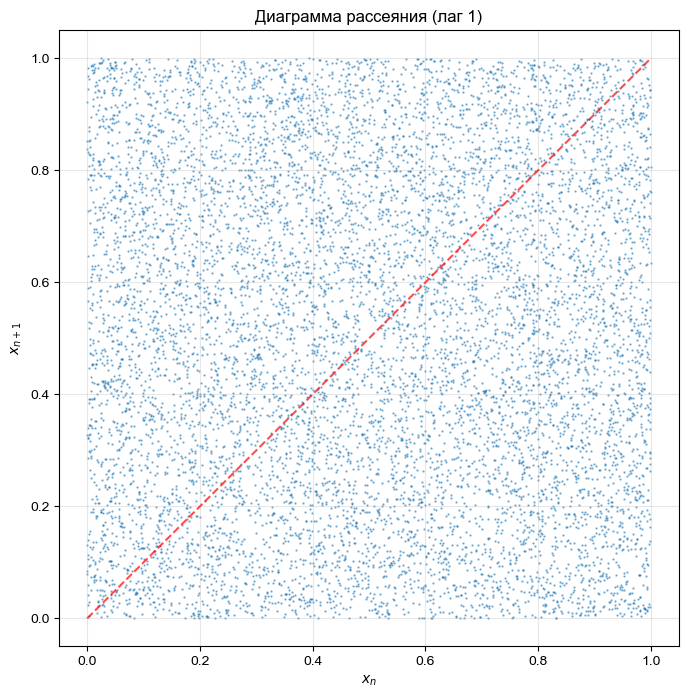

In [40]:
plt.figure(figsize=(8, 8))
# Используем первые 10000 точек для лучшей визуализации
scatter_size = min(10000, len(rnd))
plt.scatter(rnd[:scatter_size-1], rnd[1:scatter_size], s=0.5, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--', alpha=0.7)
plt.xlabel('$x_{n}$')
plt.ylabel('$x_{n+1}$')
plt.title('Диаграмма рассеяния (лаг 1)')
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# График последовательности

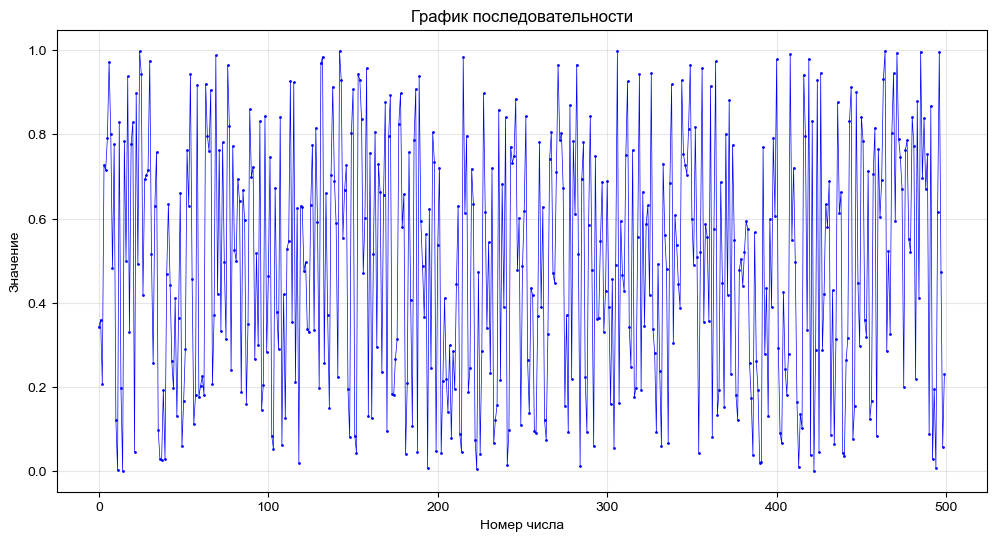

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(rnd[:500], 'b.-', markersize=2, linewidth=0.5)
plt.xlabel('Номер числа')
plt.ylabel('Значение')
plt.title('График последовательности')
plt.grid(True, alpha=0.3)
plt.savefig('sequence_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# График автокорреляции

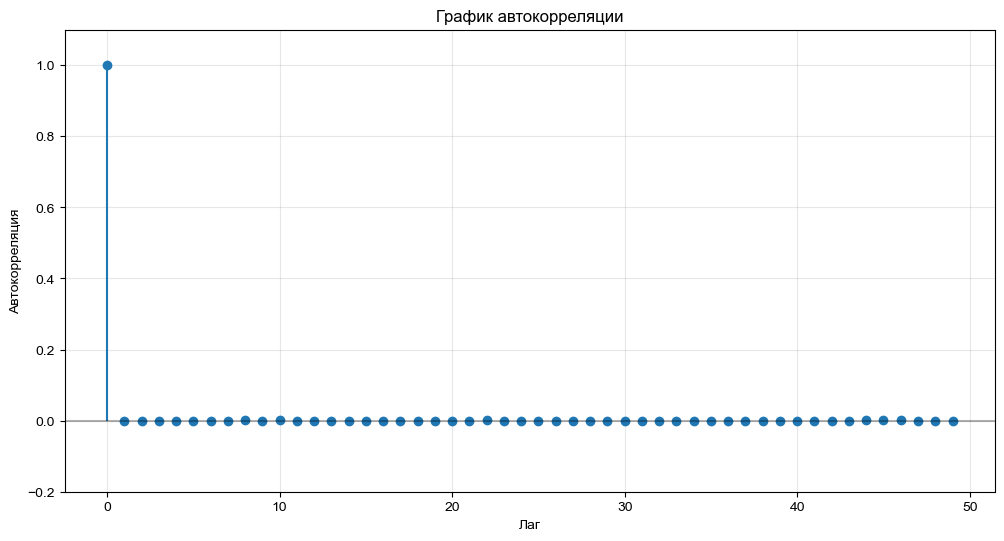

In [42]:
# 4. График автокорреляции
max_lag = 50
autocorr = []

for lag in range(max_lag):
    if lag == 0:
        autocorr.append(1.0)
    elif lag < len(rnd):
        corr = np.corrcoef(rnd[:-lag], rnd[lag:])[0,1]
        autocorr.append(corr)
    else:
        autocorr.append(0.0)

plt.figure(figsize=(12, 6))
plt.stem(range(max_lag), autocorr, basefmt=" ")
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('График автокорреляции')
plt.grid(True, alpha=0.3)
plt.ylim(-0.2, 1.1)
plt.savefig('autocorrelation.png', dpi=300, bbox_inches='tight')
plt.show()